Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))
pd.set_option('display.max_columns', None)

sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import pickle

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input

from transformers import AutoImageProcessor, TFAutoModelForImageClassification

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from transformers import AutoFeatureExtractor


from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd '/content/drive/Othercomputers/My Laptop/hackathon/Impact_Anaalysis'

/content/drive/Othercomputers/My Laptop/hackathon/Impact_Anaalysis


Loading data

In [ ]:
data=pd.read_csv('train_set.csv')

In [ ]:
data.head()

,Image Index,Finding Labels,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000011_000.png,0,0,11,75,M,PA,2638,2449,0.14,0.14
1,00000013_011.png,1,11,13,60,M,AP,3056,2544,0.14,0.14
2,00000013_012.png,1,12,13,60,M,AP,3056,2544,0.14,0.14
3,00000013_013.png,1,13,13,60,M,AP,3056,2544,0.14,0.14
4,00000013_036.png,1,36,13,56,M,PA,2952,2968,0.14,0.14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  4305 non-null   object 
 1   Finding Labels               4305 non-null   int64  
 2   Follow-up                    4305 non-null   int64  
 3   Patient ID                   4305 non-null   int64  
 4   Patient Age                  4305 non-null   int64  
 5   Patient Gender               4305 non-null   object 
 6   View Position                4305 non-null   object 
 7   OriginalImage_Width          4305 non-null   int64  
 8   OriginalImage_Height         4305 non-null   int64  
 9   OriginalImagePixelSpacing_x  4305 non-null   float64
 10  OriginalImagePixelSpacing_y  4305 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 370.1+ KB


In [ ]:
data.shape

(4305, 11)

In [ ]:
data.isnull().sum()

Image Index                    0
Finding Labels                 0
Follow-up                      0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImage_Width            0
OriginalImage_Height           0
OriginalImagePixelSpacing_x    0
OriginalImagePixelSpacing_y    0
dtype: int64

In [ ]:
data['View Position'].value_counts()

View Position
PA    2543
AP    1762
Name: count, dtype: int64

In [ ]:
data['Patient Gender'].value_counts()

Patient Gender
M    2230
F    2075
Name: count, dtype: int64

In [ ]:
data['Finding Labels'].value_counts()

Finding Labels
0    2769
1    1536
Name: count, dtype: int64

In [ ]:
data['Image Index'].nunique()

4305

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Finding Labels,"4,305.00",0.36,0.48,0.00,0.00,0.00,1.00,1.00
Follow-up,"4,305.00",13.16,18.33,0.00,3.00,7.00,16.00,173.00
Patient ID,"4,305.00","14,688.74","8,577.41",11.00,"7,670.00","14,112.00","21,374.00","30,753.00"
Patient Age,"4,305.00",49.03,16.64,5.00,36.00,52.00,61.00,152.00
OriginalImage_Width,"4,305.00","2,661.11",342.24,"1,559.00","2,500.00","2,544.00","2,992.00","3,827.00"
OriginalImage_Height,"4,305.00","2,502.88",403.60,"1,603.00","2,048.00","2,544.00","2,991.00","3,567.00"
OriginalImagePixelSpacing_x,"4,305.00",0.16,0.02,0.14,0.14,0.14,0.17,0.20
OriginalImagePixelSpacing_y,"4,305.00",0.16,0.02,0.14,0.14,0.14,0.17,0.20


In [ ]:
data[data['Patient Age']>100]

,Image Index,Finding Labels,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
2803,00018366_044.png,1,44,18366,152,0,0,2302,2991,0.14,0.14


In [ ]:
data[data['Patient ID']==18366]

,Image Index,Finding Labels,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
2793,00018366_002.png,1,2,18366,64,0,0,2376,2785,0.14,0.14
2794,00018366_015.png,1,15,18366,65,0,1,2500,2048,0.17,0.17
2795,00018366_020.png,1,20,18366,64,0,0,2600,2866,0.14,0.14
2796,00018366_028.png,1,28,18366,64,0,0,2532,2988,0.14,0.14
2797,00018366_032.png,1,32,18366,64,0,0,2642,2605,0.14,0.14
2798,00018366_037.png,1,37,18366,64,0,0,2550,2991,0.14,0.14
2799,00018366_038.png,1,38,18366,64,0,1,2680,2504,0.14,0.14
2800,00018366_039.png,0,39,18366,65,0,1,2500,2048,0.17,0.17
2801,00018366_041.png,1,41,18366,64,0,0,2234,2991,0.14,0.14
2802,00018366_042.png,1,42,18366,64,0,0,2990,2991,0.14,0.14


In [ ]:
data[data['Patient ID']==18366]['Patient Age'].median()

64.0

In [ ]:
data.loc[data['Patient Age'] > 100, 'Patient Age'] = data[data['Patient ID']==18366]['Patient Age'].median()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Finding Labels,"4,305.00",0.36,0.48,0.00,0.00,0.00,1.00,1.00
Follow-up,"4,305.00",13.16,18.33,0.00,3.00,7.00,16.00,173.00
Patient ID,"4,305.00","14,688.74","8,577.41",11.00,"7,670.00","14,112.00","21,374.00","30,753.00"
Patient Age,"4,305.00",49.01,16.57,5.00,36.00,52.00,61.00,90.00
Patient Gender,"4,305.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
View Position,"4,305.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
OriginalImage_Width,"4,305.00","2,661.11",342.24,"1,559.00","2,500.00","2,544.00","2,992.00","3,827.00"
OriginalImage_Height,"4,305.00","2,502.88",403.60,"1,603.00","2,048.00","2,544.00","2,991.00","3,567.00"
OriginalImagePixelSpacing_x,"4,305.00",0.16,0.02,0.14,0.14,0.14,0.17,0.20
OriginalImagePixelSpacing_y,"4,305.00",0.16,0.02,0.14,0.14,0.14,0.17,0.20


understanding data visually

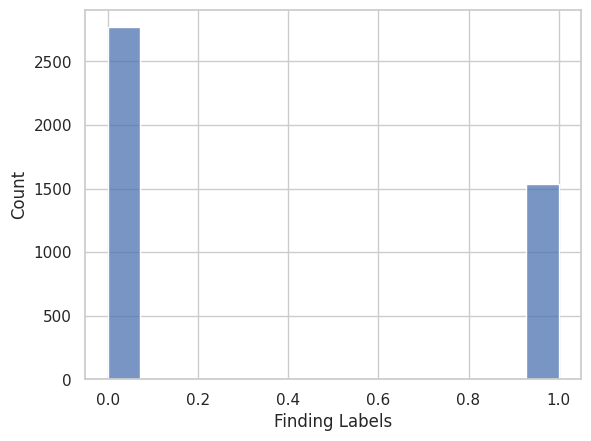

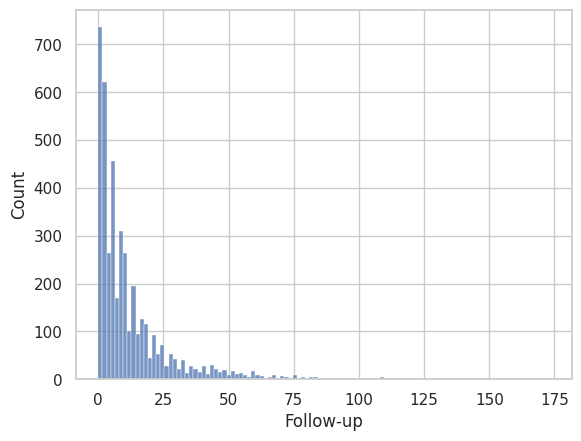

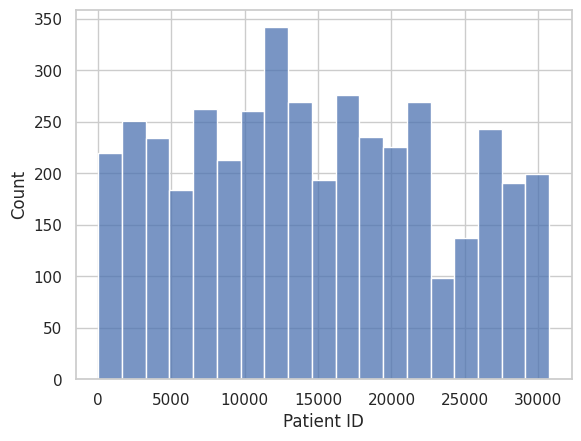

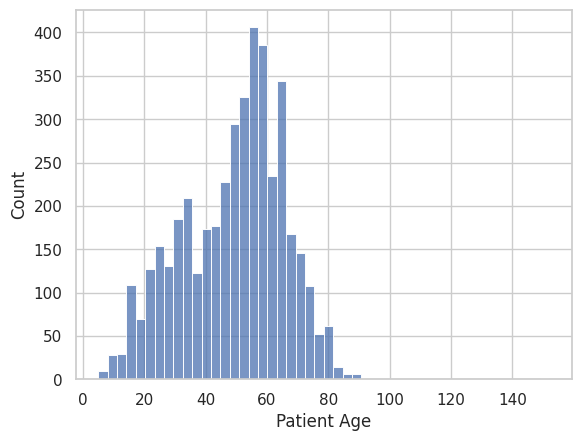

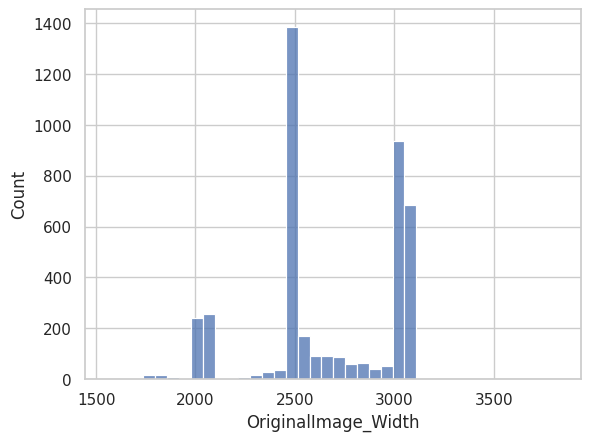

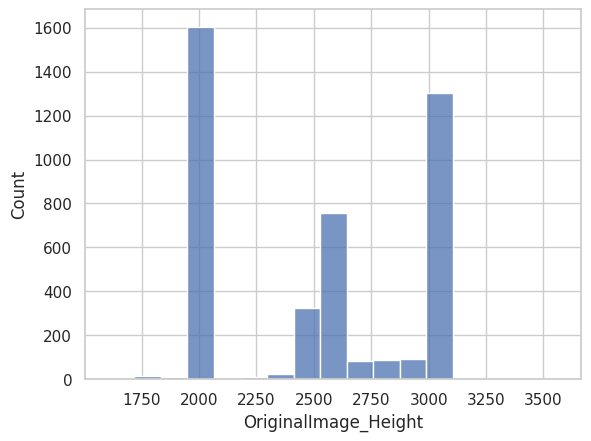

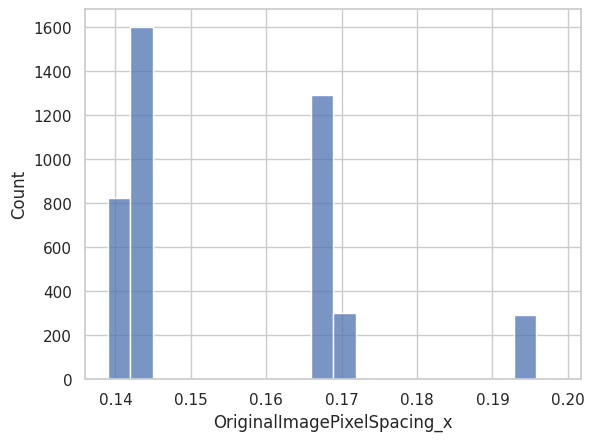

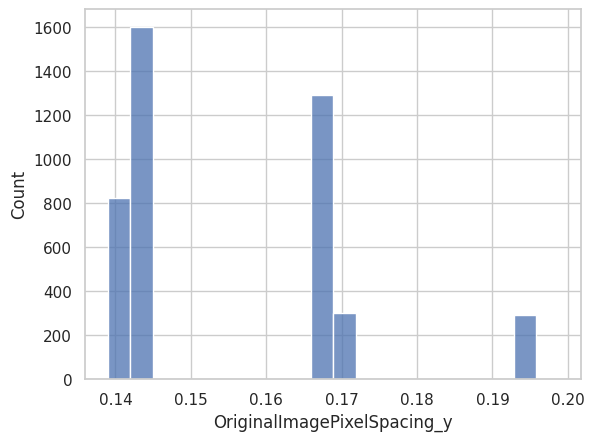

In [ ]:
int_col=data.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in int_col:
  sns.histplot(data[col])
  plt.show()

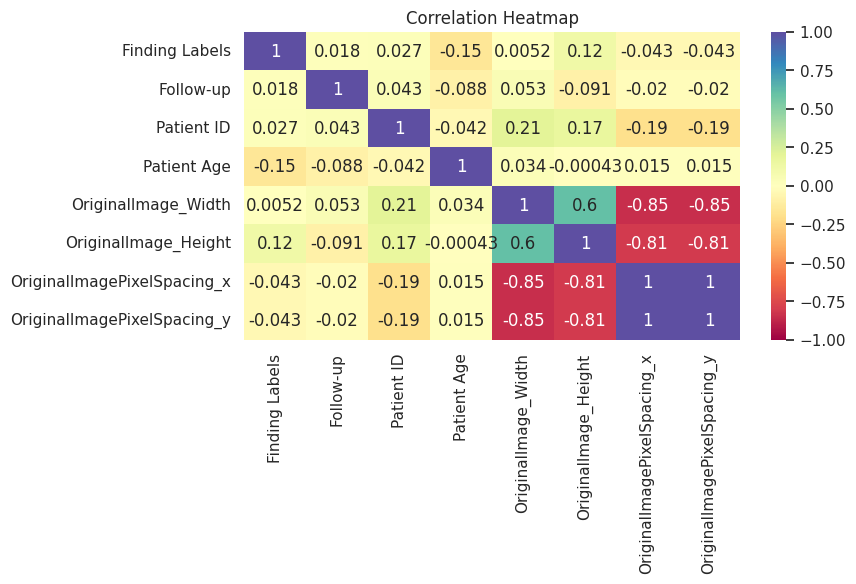

In [ ]:
plt.figure(figsize=(8,4))

sns.heatmap(data=data[int_col].corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral');
plt.title('Correlation Heatmap')
plt.show()

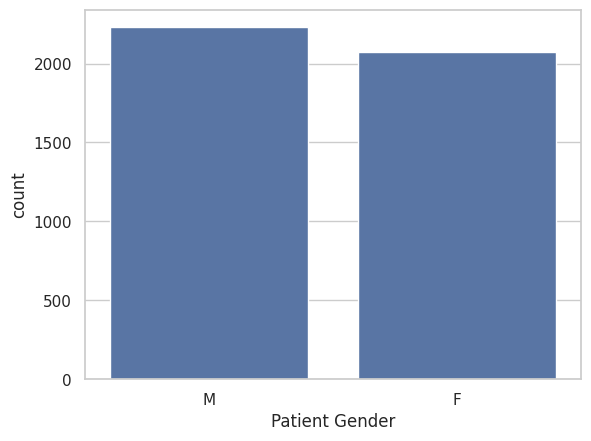

In [ ]:
sns.countplot(data=data, x='Patient Gender')
plt.show()

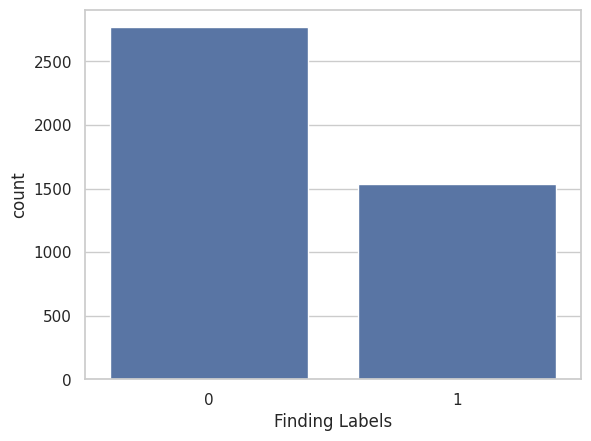

In [ ]:
sns.countplot(data=data, x='Finding Labels')
plt.show()

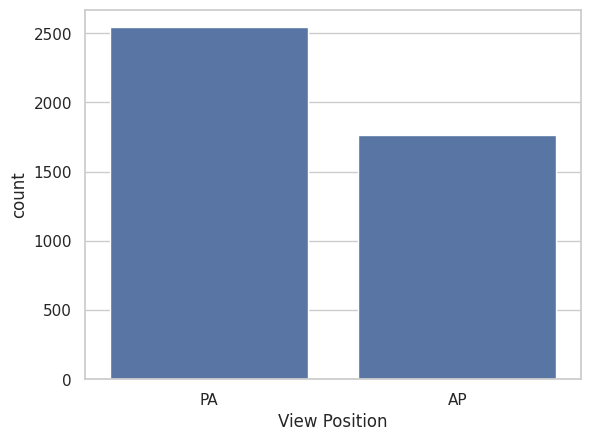

In [ ]:
sns.countplot(data=data, x='View Position')
plt.show()

Preprocessing data

In [ ]:
data_bkup=data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  4305 non-null   object 
 1   Finding Labels               4305 non-null   int64  
 2   Follow-up                    4305 non-null   int64  
 3   Patient ID                   4305 non-null   int64  
 4   Patient Age                  4305 non-null   int64  
 5   Patient Gender               4305 non-null   object 
 6   View Position                4305 non-null   object 
 7   OriginalImage_Width          4305 non-null   int64  
 8   OriginalImage_Height         4305 non-null   int64  
 9   OriginalImagePixelSpacing_x  4305 non-null   float64
 10  OriginalImagePixelSpacing_y  4305 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 370.1+ KB


In [ ]:
data['Patient Gender']=data['Patient Gender'].map({'M': 1, 'F': 0})

In [ ]:
data['View Position']=data['View Position'].map({'AP': 1, 'PA': 0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  4305 non-null   object 
 1   Finding Labels               4305 non-null   int64  
 2   Follow-up                    4305 non-null   int64  
 3   Patient ID                   4305 non-null   int64  
 4   Patient Age                  4305 non-null   int64  
 5   Patient Gender               4305 non-null   int64  
 6   View Position                4305 non-null   int64  
 7   OriginalImage_Width          4305 non-null   int64  
 8   OriginalImage_Height         4305 non-null   int64  
 9   OriginalImagePixelSpacing_x  4305 non-null   float64
 10  OriginalImagePixelSpacing_y  4305 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 370.1+ KB


In [ ]:
X=data.drop(columns=['Image Index','Finding Labels'])

In [ ]:
X.head()

,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,0,11,75,1,0,2638,2449,0.14,0.14
1,11,13,60,1,1,3056,2544,0.14,0.14
2,12,13,60,1,1,3056,2544,0.14,0.14
3,13,13,60,1,1,3056,2544,0.14,0.14
4,36,13,56,1,0,2952,2968,0.14,0.14


In [ ]:
y=data['Finding Labels']

In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Finding Labels, dtype: int64

Split train test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [ ]:
X_train.shape, y_train.shape

((3444, 9), (3444,))

In [ ]:
X_test.shape, y_test.shape

((861, 9), (861,))

In [ ]:
X_train.head()

,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
576,0,3760,77,0,1,2500,2048,0.17,0.17
2529,1,16773,63,0,1,2500,2048,0.17,0.17
2333,129,15530,21,1,1,3056,2544,0.14,0.14
2341,5,15537,52,0,1,2544,3056,0.14,0.14
3342,11,22098,46,0,1,3343,2897,0.14,0.14


In [ ]:
X_train.columns

Index(['Follow-up', 'Patient ID', 'Patient Age', 'Patient Gender',
       'View Position', 'OriginalImage_Width', 'OriginalImage_Height',
       'OriginalImagePixelSpacing_x', 'OriginalImagePixelSpacing_y'],
      dtype='object')

In [ ]:
X_train_std=X_train.copy()
X_test_std=X_test.copy()

In [ ]:
ss = StandardScaler()

In [ ]:
to_scale=['Follow-up', 'Patient ID', 'Patient Age', 'OriginalImage_Width', 'OriginalImage_Height',
       'OriginalImagePixelSpacing_x', 'OriginalImagePixelSpacing_y']

In [ ]:
X_train_std[to_scale]=ss.fit_transform(X_train[to_scale])

X_test_std[to_scale]=ss.transform(X_test[to_scale])

In [ ]:
X_train.head()

,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
576,0,3760,77,0,1,2500,2048,0.17,0.17
2529,1,16773,63,0,1,2500,2048,0.17,0.17
2333,129,15530,21,1,1,3056,2544,0.14,0.14
2341,5,15537,52,0,1,2544,3056,0.14,0.14
3342,11,22098,46,0,1,3343,2897,0.14,0.14


In [ ]:
X_test.head()

,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
3216,6,21374,81,1,1,2500,2048,0.17,0.17
638,3,4340,65,1,1,2500,2048,0.17,0.17
2766,15,18224,59,1,1,2500,2048,0.17,0.17
1899,27,12622,32,0,1,2500,2048,0.17,0.17
2166,17,14174,52,0,0,2992,2991,0.14,0.14


In [ ]:
def function_model(model_name,model, x_train, y_train, x_test, y_test):
  print('Model: ', model_name)

  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)

  train_accuracy_score= model.score(x_train, y_train)
  test_accuracy_score= model.score(x_test, y_test)

  print('Train Accuracy score: ', train_accuracy_score)
  print('Test Accuracy score: ', test_accuracy_score)

  cm=metrics.confusion_matrix(y_test, y_pred)
  cm=pd.DataFrame(cm)
  sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
  plt.title('Test Confusion Matrix')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()

  print('Classification report')
  print(classification_report(y_test, y_pred))

  precision=precision_score(y_test, y_pred, average='weighted')
  recall=recall_score(y_test, y_pred, average='weighted')
  f1=f1_score(y_test, y_pred, average='weighted')

  result=pd.DataFrame({ 'Model' : [model_name],
                 'Train Accuracy' : train_accuracy_score,
                 'Test Accuracy': test_accuracy_score,
                 'Precision': precision,
                 'recall' : recall,
                 'f1 score':f1
                })

  return result

# **Logistic Regression**

In [ ]:
logreg = LogisticRegression()


param_grid = {
    'C': [.01,0.1, 1.0],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'random_state': [42],
    'multi_class': ['multinomial']
}

# Perform grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 42, 'solver': 'lbfgs'}
Best Accuracy: 0.6666666666666666


Model:  Logistic Regression
Train Accuracy score:  0.664924506387921
Test Accuracy score:  0.6666666666666666


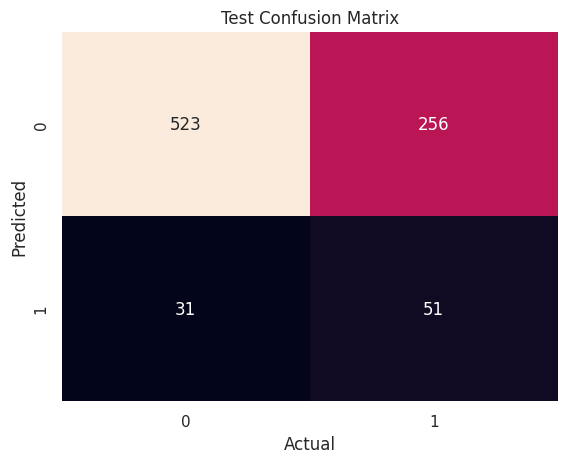

Classification report
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       554
           1       0.62      0.17      0.26       307

    accuracy                           0.67       861
   macro avg       0.65      0.56      0.52       861
weighted avg       0.65      0.67      0.60       861



In [ ]:
lr= LogisticRegression(C=.01,solver='lbfgs', multi_class='multinomial', random_state = 42, max_iter=100)

lr_result=function_model("Logistic Regression",lr, X_train_std, y_train, X_test_std, y_test)

**KNN**

In [ ]:
#lets find best param for KNN
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7,9,11,13,15,7,19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2,3,4],
    'metric': ['minkowski','euclidean', 'manhattan']
}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'metric': 'minkowski', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.7224157955865272


Model:  K Nearest Neighbour
Train Accuracy score:  1.0
Test Accuracy score:  0.7224157955865272


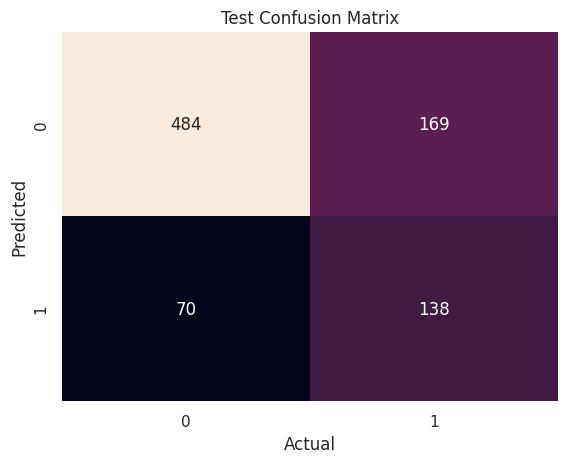

Classification report
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       554
           1       0.66      0.45      0.54       307

    accuracy                           0.72       861
   macro avg       0.70      0.66      0.67       861
weighted avg       0.71      0.72      0.71       861



In [ ]:
knn=KNeighborsClassifier(n_neighbors=19, metric='minkowski', p=1, weights='distance', n_jobs=-1)

knn_result=function_model("K Nearest Neighbour",knn, X_train_std, y_train, X_test_std, y_test)

**SVC**

In [ ]:
#lets do grid search for SVC
mod_svm = svm.SVC()

param_grid = {
    'C': [0.1,1,10],
    'kernel': ['rbf', 'linear'],
    'degree': [1,2,3],
    'gamma': [.01,0.1,1],
    'random_state':[42]
}

# Perform grid search
grid_search = GridSearchCV(mod_svm, param_grid, scoring='accuracy', n_jobs=-1, cv=3)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf', 'random_state': 42}
Best Accuracy: 0.6922183507549361


Model:  SVC
Train Accuracy score:  0.7656794425087108
Test Accuracy score:  0.6922183507549361


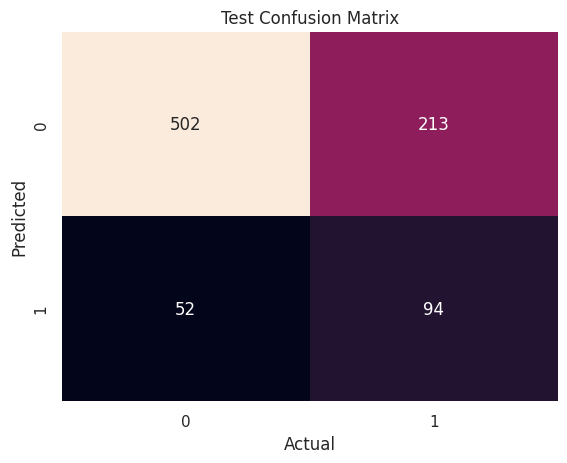

Classification report
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       554
           1       0.64      0.31      0.42       307

    accuracy                           0.69       861
   macro avg       0.67      0.61      0.60       861
weighted avg       0.68      0.69      0.66       861



In [ ]:
svc=svm.SVC(C=1, degree=1, gamma=1, kernel='rbf', random_state=42)

svc_result=function_model("SVC",svc, X_train_std, y_train, X_test_std, y_test)

**Decision Trees**

In [ ]:
#lets do grid search for Decision trees
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [6,7,8,11,15,17,20],
    'min_samples_split': [3,5,7,9,11,13,15],
    'random_state': [42],
    'min_samples_leaf': [3,5,10,15,20],
}


clf = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 9, 'random_state': 42}
Best Accuracy: 0.6631823461091754


Model:  Decision Tree
Train Accuracy score:  0.8385598141695703
Test Accuracy score:  0.6631823461091754


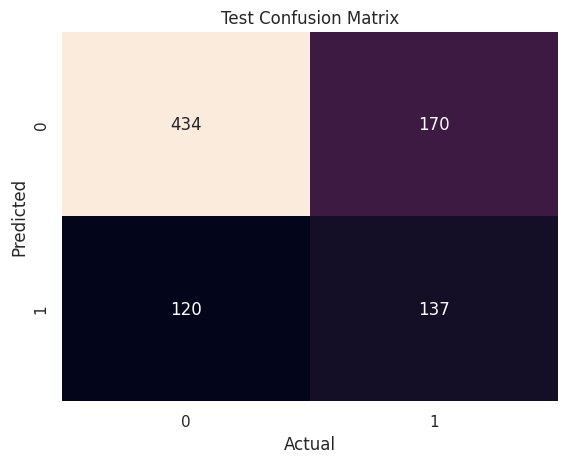

Classification report
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       554
           1       0.53      0.45      0.49       307

    accuracy                           0.66       861
   macro avg       0.63      0.61      0.62       861
weighted avg       0.65      0.66      0.66       861



In [ ]:
dt=DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=11, min_samples_leaf=3, min_samples_split=9)

dt_result=function_model("Decision Tree",dt, X_train_std, y_train, X_test_std, y_test)

**Random Forest**

In [ ]:
#lets do grid search for random forest
param_grid = {
    'n_estimators': [100,150,200],
    'criterion': ['gini'],
    'max_depth': [4,9,11,13],
    'min_samples_split': [8,10,12,15],
    'random_state': [42],
    'min_samples_leaf': [3,4,5,7,9] #,
    ##'max_features': ['sqrt', 'log2']
}

# Create a decision tree classifier
rf = RandomForestClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200, 'random_state': 42}
Best Accuracy: 0.7282229965156795


Model:  Random Forest
Train Accuracy score:  0.8702090592334495
Test Accuracy score:  0.7282229965156795


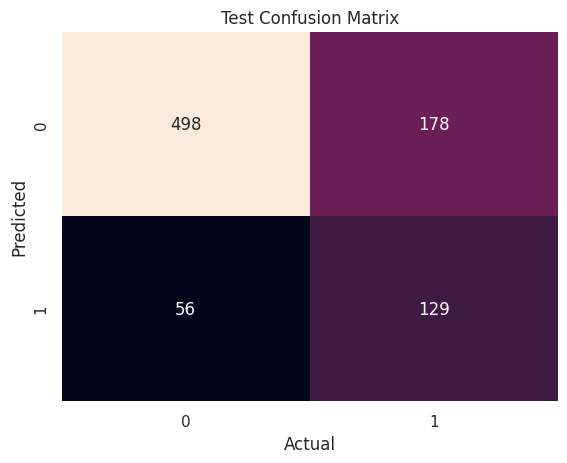

Classification report
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       554
           1       0.70      0.42      0.52       307

    accuracy                           0.73       861
   macro avg       0.72      0.66      0.67       861
weighted avg       0.72      0.73      0.71       861



In [ ]:
rf=RandomForestClassifier(criterion='gini', random_state=42, max_depth=13, min_samples_leaf=3, min_samples_split=8,
                                  n_estimators=200)

rf_result=function_model("Random Forest",rf, X_train_std, y_train, X_test_std, y_test)

**Adaboost**

In [ ]:
#grid search for Adaboost
param_grid = {
    'n_estimators': [50,75,150,175],
    'learning_rate': [.001,.05,0.1,.5,.75,1],
    'random_state': [42]
}

# Create a decision tree classifier
adab = AdaBoostClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=adab, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.75, 'n_estimators': 150, 'random_state': 42}
Best Accuracy: 0.6852497096399536


Model:  Ada Boost
Train Accuracy score:  0.6713124274099884
Test Accuracy score:  0.6631823461091754


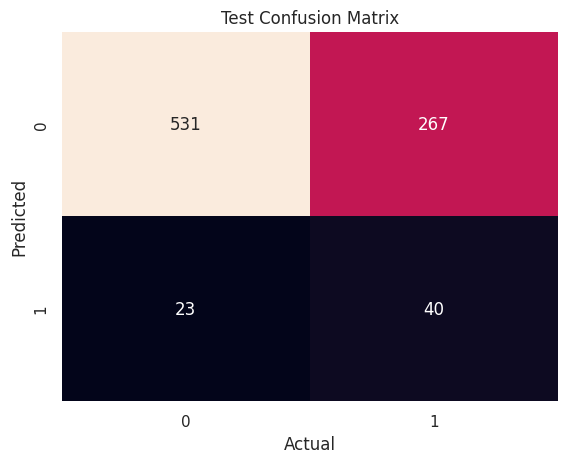

Classification report
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       554
           1       0.63      0.13      0.22       307

    accuracy                           0.66       861
   macro avg       0.65      0.54      0.50       861
weighted avg       0.65      0.66      0.58       861



In [ ]:
ada_boost= AdaBoostClassifier(random_state=42, n_estimators=75, learning_rate=.1)

ada_result=function_model("Ada Boost",ada_boost, X_train_std, y_train, X_test_std, y_test)

**Gradient Boosting**

In [ ]:
#grid search for Gradient boosting
param_grid = {
    'n_estimators': [50,100],
    'learning_rate': [0.05,0.005],
    'max_depth': [5,7],
    'random_state': [42],
    'subsample': [.85,.9],
    'min_samples_split': [10,20],
    #'min_samples_leaf': [5,10],
    'max_features': ['auto', 'sqrt']
}

# Create a decision tree classifier
gradB = GradientBoostingClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=gradB, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.85}
Best Accuracy: 0.7282229965156795


Model:  Gradient Boosting
Train Accuracy score:  0.8667247386759582
Test Accuracy score:  0.7282229965156795


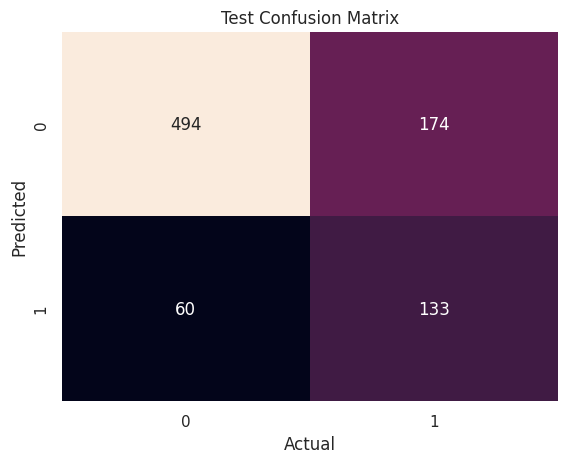

Classification report
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       554
           1       0.69      0.43      0.53       307

    accuracy                           0.73       861
   macro avg       0.71      0.66      0.67       861
weighted avg       0.72      0.73      0.71       861



In [ ]:
grad_boost= GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=.05, max_depth=7, max_features='sqrt', subsample=.85,min_samples_split= 10)

gb_result=function_model("Gradient Boosting",grad_boost, X_train_std, y_train, X_test_std, y_test)

**XGboost**

In [ ]:
#lets try Grid search for XGboost
param_grid = {
    'booster': ['gbtree'], #, 'gblinear', 'dart'],
    'n_estimators': [100,150],
    'learning_rate': [0.01, 0.3],
    'max_depth':  [6,8,10],
    'sampling_method': ['uniform'], #, 'gradient_based'],
    'reg_alpha': [0.1, 0.3],
    'reg_lambda': [0.5, 0.3]
}

xgb_clf = xgb.XGBClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'booster': 'gbtree', 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 150, 'reg_alpha': 0.3, 'reg_lambda': 0.5, 'sampling_method': 'uniform'}
Best Accuracy: 0.7293844367015099


Model:  XGB
Train Accuracy score:  0.9944831591173054
Test Accuracy score:  0.7386759581881533


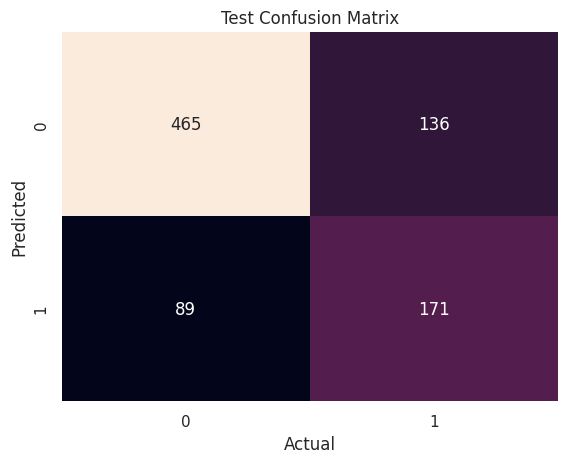

Classification report
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       554
           1       0.66      0.56      0.60       307

    accuracy                           0.74       861
   macro avg       0.72      0.70      0.70       861
weighted avg       0.73      0.74      0.73       861



In [ ]:
xgb_clf = xgb.XGBClassifier(booster='gbtree', learning_rate=.3, max_depth=8, n_estimator=100, sampling_method='uniform', reg_alpha=.3, reg_lambda=.5)

xgb_result=function_model("XGB",xgb_clf, X_train_std, y_train, X_test_std, y_test)

In [ ]:
with open('./saved_files/standard_scaler.pkl', 'wb') as file:
    pickle.dump(ss, file)

**LightGBM**

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [150, 100],
    'max_depth': [3, 4, 5,7],
    'colsample_bytree': [0.8, .9],
    'reg_alpha': [0.5, 0.3],
    'reg_lambda': [0.5, 0.3]
}

# Initialize the LGBMClassifier
lgbm_clf = LGBMClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1229, number of negative: 2215
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 3444, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356852 -> initscore=-0.589052
[LightGBM] [Info] Start training from score -0.589052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
lgbm = LGBMClassifier(colsample_bytree=.9, learning_rate=.05, max_depth=7, n_estimators=150, reg_alpha=.5, reg_lambda=.5)

lgbm_result=function_model("Light GBM",lgbm, X_train_std, y_train, X_test_std, y_test)

**ANN**

ANN-3 layer

Epoch 1/30
108/108 [==============================] - 11s 20ms/step - loss: 0.7640 - accuracy: 0.5505 - val_loss: 0.6551 - val_accuracy: 0.6341
Epoch 2/30
108/108 [==============================] - 1s 12ms/step - loss: 0.6808 - accuracy: 0.6280 - val_loss: 0.6303 - val_accuracy: 0.6562
Epoch 3/30
108/108 [==============================] - 1s 9ms/step - loss: 0.6638 - accuracy: 0.6353 - val_loss: 0.6182 - val_accuracy: 0.6551
Epoch 4/30
108/108 [==============================] - 1s 9ms/step - loss: 0.6542 - accuracy: 0.6434 - val_loss: 0.6166 - val_accuracy: 0.6597
Epoch 5/30
108/108 [==============================] - 1s 9ms/step - loss: 0.6473 - accuracy: 0.6405 - val_loss: 0.6144 - val_accuracy: 0.6632
Epoch 6/30
108/108 [==============================] - 1s 12ms/step - loss: 0.6318 - accuracy: 0.6562 - val_loss: 0.6118 - val_accuracy: 0.6678
Epoch 7/30
108/108 [==============================] - 2s 14ms/step - loss: 0.6337 - accuracy: 0.6519 - val_loss: 0.6109 - val_accuracy: 0.6655
E

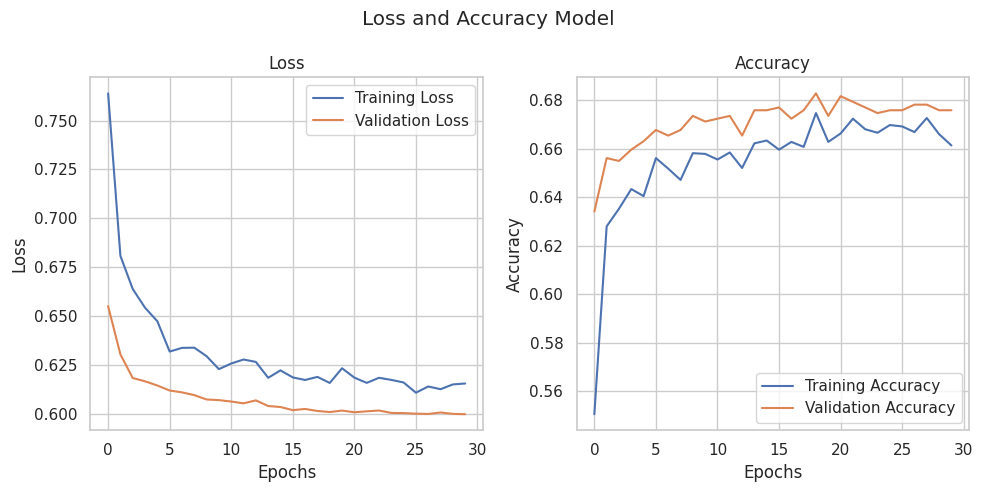

In [ ]:

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=X_train_std.shape[1]))


model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output


#model summary
#model.summary()


#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(X_train_std,y_train, validation_data=(X_test_std,y_test),
                   epochs=30,
                   batch_size=32,
                   verbose=1)

#Plotting loss and accuracy for both the models
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Loss and Accuracy Model ')

axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

Epoch 1/50
108/108 [==============================] - 7s 15ms/step - loss: 0.7726 - accuracy: 0.5526 - val_loss: 0.6233 - val_accuracy: 0.6411 - lr: 0.0010
Epoch 2/50
108/108 [==============================] - 1s 10ms/step - loss: 0.7004 - accuracy: 0.5854 - val_loss: 0.6123 - val_accuracy: 0.6574 - lr: 0.0010
Epoch 3/50
108/108 [==============================] - 1s 10ms/step - loss: 0.6702 - accuracy: 0.6069 - val_loss: 0.6081 - val_accuracy: 0.6818 - lr: 0.0010
Epoch 4/50
108/108 [==============================] - 1s 10ms/step - loss: 0.6554 - accuracy: 0.6237 - val_loss: 0.6052 - val_accuracy: 0.6852 - lr: 0.0010
Epoch 5/50
108/108 [==============================] - 2s 15ms/step - loss: 0.6416 - accuracy: 0.6370 - val_loss: 0.6019 - val_accuracy: 0.6864 - lr: 0.0010
Epoch 6/50
108/108 [==============================] - 1s 14ms/step - loss: 0.6413 - accuracy: 0.6339 - val_loss: 0.6043 - val_accuracy: 0.6760 - lr: 0.0010
Epoch 7/50
108/108 [==============================] - 1s 14ms/st

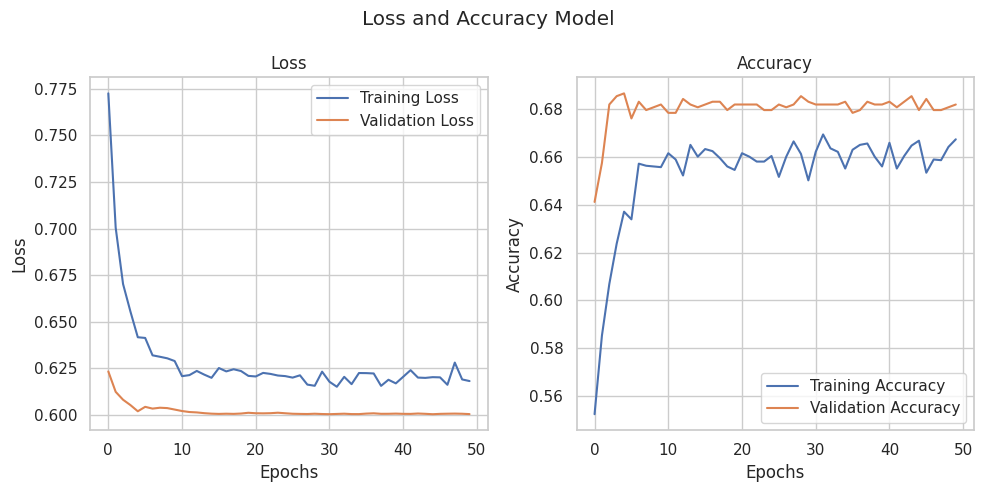

In [ ]:

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=X_train_std.shape[1]))

#model.add(tf.keras.layers.Dense(256, activation='relu',  kernel_initializer='he_uniform'))
#model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output


#model summary
#model.summary()


#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),loss='binary_crossentropy',metrics=['accuracy'])
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6)



history=model.fit(X_train_std,y_train, validation_data=(X_test_std,y_test),
                   epochs=50,
                   batch_size=32,
                   callbacks=[lr_scheduler],
                   verbose=1)

#Plotting loss and accuracy for both the models
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Loss and Accuracy Model ')

axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

In [ ]:
fun_ann_csv(X_eval, model, 'ann-4-LR')

58/58 [==============================] - 1s 7ms/step


##Computer vision model

In [ ]:
# Define the file ID and destination path
file_id = '1CCFEAUX5I3p4UB8UxrnuHtyKL49b0WWx&export=download&authuser=0&confirm=t&uuid=c3772463-0f67-426e-9481-43a7e92916eb&at=APZUnTUfTFIEHoTDq_4k25IB3qXT:1722086733924'
destination = '/content/filename.zip'

# Use gdown to download the file
!pip install gdown
import gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1CCFEAUX5I3p4UB8UxrnuHtyKL49b0WWx&export=download&authuser=0&confirm=t&uuid=c3772463-0f67-426e-9481-43a7e92916eb&at=APZUnTUfTFIEHoTDq_4k25IB3qXT:1722086733924
To: /content/filename.zip
100%|██████████| 1.73G/1.73G [00:17<00:00, 96.7MB/s]


'/content/filename.zip'

In [ ]:
mv /content/filename.zip ./train_images.zip

In [ ]:
# Unzip the file
!unzip train_images.zip -d ./train_images

Archive:  train_images.zip
   creating: ./train_images/train_images/0/
  inflating: ./train_images/train_images/0/00000011_000.png  
  inflating: ./train_images/train_images/0/00000039_004.png  
  inflating: ./train_images/train_images/0/00000041_006.png  
  inflating: ./train_images/train_images/0/00000056_001.png  
  inflating: ./train_images/train_images/0/00000061_011.png  
  inflating: ./train_images/train_images/0/00000071_002.png  
  inflating: ./train_images/train_images/0/00000071_007.png  
  inflating: ./train_images/train_images/0/00000074_000.png  
  inflating: ./train_images/train_images/0/00000076_000.png  
  inflating: ./train_images/train_images/0/00000084_000.png  
  inflating: ./train_images/train_images/0/00000090_003.png  
  inflating: ./train_images/train_images/0/00000090_008.png  
  inflating: ./train_images/train_images/0/00000091_009.png  
  inflating: ./train_images/train_images/0/00000099_002.png  
  inflating: ./train_images/train_images/0/00000099_003.png  

In [ ]:
base_dir = './train_images/train_images'
class_names = os.listdir(base_dir)

filepaths = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(base_dir, class_name)
    for image_filename in os.listdir(class_dir):
        if image_filename.endswith('.jpg') or image_filename.endswith('.png'):  # adjust extensions as needed
            filepaths.append(os.path.join(class_dir, image_filename))
            labels.append(class_name)

# Create a DataFrame
img_train_pd = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

In [ ]:
img_train_pd.shape

(4305, 2)

In [ ]:
img_train_pd.head()

,filepath,label
0,./train_images/train_images/0/00000011_000.png,0
1,./train_images/train_images/0/00000039_004.png,0
2,./train_images/train_images/0/00000041_006.png,0
3,./train_images/train_images/0/00000056_001.png,0
4,./train_images/train_images/0/00000061_011.png,0


In [ ]:
img_train_pd['label'].value_counts()

label
0    2769
1    1536
Name: count, dtype: int64

In [ ]:
pickle_filepath = './saved_files/img_train_pd.pickle'
with open(pickle_filepath, 'wb') as f:
    pickle.dump(img_train_pd, f)

In [ ]:
pickle_filepath = './saved_files/img_train_pd.pickle'
with open(pickle_filepath, 'rb') as f:
    img_train_pd = pickle.load(f)

In [ ]:
train_df, val_df = train_test_split(img_train_pd, test_size=0.20, stratify=img_train_pd['label'], random_state=42)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3444 entries, 3018 to 2174
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  3444 non-null   object
 1   label     3444 non-null   object
dtypes: object(2)
memory usage: 80.7+ KB


Mobilenetv2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Define parameters
image_size = (224, 224)
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 model with pre-trained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Dropout to reduce overfitting
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-50:]:  # Unfreeze the last 50 layers
    layer.trainable = True

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='./saved_model/mobilenetv2_best_weights.h5',  # Path to save the model
    monitor='val_accuracy',  # Monitor the validation loss
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the entire model, not just weights
    verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    callbacks=[reduce_lr,checkpoint],
    validation_data=val_generator
)

# Save the trained model
model.save('./saved_model/mobilenetv2_model_finetune.h5')

Found 3444 validated image filenames belonging to 2 classes.
Found 861 validated image filenames belonging to 2 classes.


Epoch 1/10
108/108 [==============================] - ETA: 0s - loss: 0.6144 - accuracy: 0.6847
Epoch 1: val_accuracy improved from -inf to 0.64344, saving model to ./saved_model/mobilenetv2_best_weights.h5
108/108 [==============================] - 859s 8s/step - loss: 0.6144 - accuracy: 0.6847 - val_loss: 3.5538 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 2/10
108/108 [==============================] - ETA: 0s - loss: 0.5300 - accuracy: 0.7334
Epoch 2: val_accuracy did not improve from 0.64344
108/108 [==============================] - 119s 1s/step - loss: 0.5300 - accuracy: 0.7334 - val_loss: 4.5728 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 3/10
108/108 [==============================] - ETA: 0s - loss: 0.4931 - accuracy: 0.7634
Epoch 3: val_accuracy did not improve from 0.64344
108/108 [==============================] - 117s 1s/step - loss: 0.4931 - accuracy: 0.7634 - val_loss: 5.4618 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 4/10
108/108 [==============================] - ETA: 0s - 

In [ ]:
# Load the saved model
model1 = tf.keras.models.load_model('./saved_model/mobilenetv2_model_finetune.h5')

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='./saved_model/mobilenetv2_best_weights.h5',  # Path to save the model
    monitor='val_accuracy',  # Monitor the validation loss
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the entire model, not just weights
    verbose=1
)

# Train the model
history = model1.fit(
    train_generator,
    epochs=20,
    initial_epoch=10,
    callbacks=[reduce_lr,checkpoint],
    validation_data=val_generator
)

# Save the trained model
model1.save('./saved_model/mobilenetv2_model_finetune.h5')

Epoch 11/20
108/108 [==============================] - ETA: 0s - loss: 0.3261 - accuracy: 0.8606
Epoch 11: val_accuracy improved from -inf to 0.73751, saving model to ./saved_model/mobilenetv2_best_weights.h5
108/108 [==============================] - 143s 1s/step - loss: 0.3261 - accuracy: 0.8606 - val_loss: 1.1230 - val_accuracy: 0.7375 - lr: 4.0000e-05
Epoch 12/20
108/108 [==============================] - ETA: 0s - loss: 0.3208 - accuracy: 0.8638
Epoch 12: val_accuracy improved from 0.73751 to 0.74564, saving model to ./saved_model/mobilenetv2_best_weights.h5
108/108 [==============================] - 119s 1s/step - loss: 0.3208 - accuracy: 0.8638 - val_loss: 0.9762 - val_accuracy: 0.7456 - lr: 4.0000e-05
Epoch 13/20
108/108 [==============================] - ETA: 0s - loss: 0.3158 - accuracy: 0.8682
Epoch 13: val_accuracy improved from 0.74564 to 0.76539, saving model to ./saved_model/mobilenetv2_best_weights.h5
108/108 [==============================] - 124s 1s/step - loss: 0.315

In [ ]:
# Train the model
history = model1.fit(
    train_generator,
    epochs=30,
    initial_epoch=20,
    callbacks=[reduce_lr,checkpoint],
    validation_data=val_generator
)

# Save the trained model
model1.save('./saved_model/mobilenetv2_model_finetune_1.h5')

Epoch 21/30
108/108 [==============================] - ETA: 0s - loss: 0.2776 - accuracy: 0.8873
Epoch 21: val_accuracy improved from 0.82927 to 0.84437, saving model to ./saved_model/mobilenetv2_best_weights.h5
108/108 [==============================] - 120s 1s/step - loss: 0.2776 - accuracy: 0.8873 - val_loss: 0.4307 - val_accuracy: 0.8444 - lr: 4.0000e-05
Epoch 22/30
108/108 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.8812
Epoch 22: val_accuracy improved from 0.84437 to 0.84553, saving model to ./saved_model/mobilenetv2_best_weights.h5
108/108 [==============================] - 120s 1s/step - loss: 0.2805 - accuracy: 0.8812 - val_loss: 0.4409 - val_accuracy: 0.8455 - lr: 4.0000e-05
Epoch 23/30
108/108 [==============================] - ETA: 0s - loss: 0.2832 - accuracy: 0.8853
Epoch 23: val_accuracy did not improve from 0.84553
108/108 [==============================] - 118s 1s/step - loss: 0.2832 - accuracy: 0.8853 - val_loss: 0.4178 - val_accuracy: 0.84

## Vision Transformer

In [ ]:
!pip install --upgrade transformers

!pip install tf-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 30.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [ ]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [ ]:
import torch
import torchvision
from PIL import Image
from transformers import ViTForImageClassification, Trainer, TrainingArguments
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [ ]:

# Image preprocessing function
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize((224, 224))  # Resizing for ViT input
    image = np.array(image) / 255.0   # Normalize
    image = torch.tensor(image, dtype=torch.float32)  # Convert to torch tensor
    image = image.permute(2, 0, 1)  # Channels first
    return image

# Dataset class
class XRayDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df.iloc[idx]['filepath']
        image = preprocess_image(image_path)
        label = int(self.df.iloc[idx]['label'])  # Convert label to int
        return {'pixel_values': image, 'labels': label}

# Datasets and DataLoader
train_dataset = XRayDataset(train_df)
val_dataset = XRayDataset(val_df)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load ViT model with correct output size
num_labels = 2
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=num_labels,
    ignore_mismatched_sizes=True
)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=10,
    eval_steps=100,
)

# Define metrics function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.461600,0.470848,0.782811,0.798291,0.782811,0.786369
2,0.480300,0.616981,0.696864,0.742827,0.696864,0.626012
3,0.212000,0.539190,0.795587,0.811814,0.795587,0.799033
4,0.174100,0.784571,0.804878,0.802437,0.804878,0.799554
5,0.055800,0.928467,0.814170,0.817518,0.814170,0.815393
6,0.006400,1.100654,0.802555,0.800493,0.802555,0.801152
7,0.000300,1.149121,0.808362,0.807959,0.808362,0.808151


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.461600,0.470848,0.782811,0.798291,0.782811,0.786369
2,0.480300,0.616981,0.696864,0.742827,0.696864,0.626012
3,0.212000,0.539190,0.795587,0.811814,0.795587,0.799033
4,0.174100,0.784571,0.804878,0.802437,0.804878,0.799554
5,0.055800,0.928467,0.814170,0.817518,0.814170,0.815393
6,0.006400,1.100654,0.802555,0.800493,0.802555,0.801152
7,0.000300,1.149121,0.808362,0.807959,0.808362,0.808151
8,0.000100,1.181027,0.809524,0.808522,0.809524,0.808949
9,0.000100,1.203494,0.809524,0.807909,0.809524,0.808490
10,0.000100,1.209607,0.808362,0.806643,0.808362,0.807243


TrainOutput(global_step=1080, training_loss=0.13997157989096767, metrics={'train_runtime': 3467.0812, 'train_samples_per_second': 9.933, 'train_steps_per_second': 0.312, 'total_flos': 2.6688241223265485e+18, 'train_loss': 0.13997157989096767, 'epoch': 10.0})

In [ ]:
# Save the model
model.save_pretrained('./results')

In [ ]:
pickle_filepath = './saved_files/img_test_pd.pickle'

# Load the DataFrame from the pickle file
with open(pickle_filepath, 'rb') as f:
    img_test_pd = pickle.load(f)

Inference for vision transformer

In [ ]:
# Image preprocessing function
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize((224, 224))  # Resizing for ViT input
    image = np.array(image) / 255.0   # Normalize
    image = torch.tensor(image, dtype=torch.float32)  # Convert to torch tensor
    image = image.permute(2, 0, 1)  # Channels first
    return image

# Dataset class for test data
class TestXRayDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df.iloc[idx]['filepath']
        image = preprocess_image(image_path)
        return {'pixel_values': image}

# Load test dataset and DataLoader
test_dataset = TestXRayDataset(img_test_pd)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the trained model
model = ViTForImageClassification.from_pretrained('./results', num_labels=2)

# Set model to evaluation mode
model.eval()

# Device configuration (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Prediction function
def predict(model, test_loader):
    all_predictions = []
    with torch.no_grad():
        for batch in test_loader:
            inputs = batch['pixel_values'].to(device)
            outputs = model(inputs)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            all_predictions.extend(predictions.cpu().numpy())
    return all_predictions

# Get predictions
predictions = predict(model, test_loader)

# Convert predictions to labels if needed
# Assuming your labels were 0 and 1, this step is straightforward
predicted_labels = predictions

# Print or save predictions
for idx, filepath in enumerate(img_test_pd['filepath']):
    print(f"Image: {filepath}, Predicted Label: {predicted_labels[idx]}")


Image: ./test_images/test_images/00000013_020.png, Predicted Label: 0
Image: ./test_images/test_images/00000013_021.png, Predicted Label: 0
Image: ./test_images/test_images/00000013_033.png, Predicted Label: 1
Image: ./test_images/test_images/00000025_000.png, Predicted Label: 0
Image: ./test_images/test_images/00000061_002.png, Predicted Label: 0
Image: ./test_images/test_images/00000061_006.png, Predicted Label: 0
Image: ./test_images/test_images/00000061_007.png, Predicted Label: 0
Image: ./test_images/test_images/00000061_008.png, Predicted Label: 0
Image: ./test_images/test_images/00000071_001.png, Predicted Label: 0
Image: ./test_images/test_images/00000084_001.png, Predicted Label: 0
Image: ./test_images/test_images/00000096_002.png, Predicted Label: 0
Image: ./test_images/test_images/00000096_006.png, Predicted Label: 0
Image: ./test_images/test_images/00000103_003.png, Predicted Label: 1
Image: ./test_images/test_images/00000116_005.png, Predicted Label: 0
Image: ./test_images

In [ ]:
data = []

# Process each file and prediction
for idx, filepath in enumerate(img_test_pd['filepath']):
    # Extract the filename without the path
    image_index = filepath.split('/')[-1]  # Or os.path.basename(filepath)
    predicted_label = predicted_labels[idx]
    data.append([image_index, predicted_label])

# Create a DataFrame with the required columns
results_df = pd.DataFrame(data, columns=["Image Index", "Finding Labels"])

# Display the DataFrame
print(results_df)

# Optionally, save the DataFrame to a CSV file
results_df.to_csv('./predictions_vit.csv', index=False)

           Image Index  Finding Labels
0     00000013_020.png               0
1     00000013_021.png               0
2     00000013_033.png               1
3     00000025_000.png               0
4     00000061_002.png               0
...                ...             ...
1839  00030636_001.png               1
1840  00030636_010.png               0
1841  00030637_010.png               1
1842  00030753_008.png               0
1843  00030786_000.png               0

[1844 rows x 2 columns]


## Inference for ML model

In [ ]:
data_eval=pd.read_csv('test_set.csv')

In [ ]:
data_eval.head()

In [ ]:
data_eval.shape

In [ ]:
data_eval.isnull().sum()

In [ ]:
data_eval.describe().T

In [ ]:
data_eval['View Position']=data_eval['View Position'].map({'AP': 1, 'PA': 0})
data_eval['Patient Gender']=data_eval['Patient Gender'].map({'M': 1, 'F': 0})

In [ ]:
data_eval.info()

In [ ]:
X_eval=data_eval.drop(columns=['Image Index'])

In [ ]:
X_eval[to_scale]=ss.transform(X_eval[to_scale])

In [ ]:
def fun_sub_csv(X_eval, model, model_name):
  eval_pred=model.predict(X_eval)
  submit_data={
    "Image Index": data_eval['Image Index'],
    "Finding Labels": eval_pred
  }

  submit_data=pd.DataFrame(submit_data)
  submit_data.to_csv('./submission_files/submission_'+model_name+'.csv', index=False)
  return

def fun_ann_csv(X_eval, model, model_name):
  eval_pred=model.predict(X_eval)
  #y_pred_multiclass=model.predict(X_test_std)
  y_pred= np.argmax(eval_pred,axis=1)

  submit_data={
    "Image Index": data_eval['Image Index'],
    "Finding Labels": y_pred.tolist()
  }

  submit_data=pd.DataFrame(submit_data)
  submit_data.to_csv('./submission_files/submission_'+model_name+'.csv', index=False)
  return


In [ ]:
fun_sub_csv(X_eval, grad_boost,'gboost')

In [ ]:
fun_sub_csv(X_eval, xgb_clf,'xgboost')

In [ ]:
fun_sub_csv(X_eval, rf,'rf')

In [ ]:
%ls submission_files

## Inference for Image processing ML vision model

In [ ]:
# Define the file ID and destination path
file_id = '1da81_zZy73KMQrBG6b3U5ZyeqTxk-ocG&export=download&authuser=0&confirm=t&uuid=85aed227-39ff-417e-96e5-db8b98c20243&at=APZUnTVWq-P3M1CKbfzuJi2lntLL:1722151237559'
destination = '/content/test_images.zip'

# Use gdown to download the file
!pip install gdown
import gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1da81_zZy73KMQrBG6b3U5ZyeqTxk-ocG&export=download&authuser=0&confirm=t&uuid=85aed227-39ff-417e-96e5-db8b98c20243&at=APZUnTVWq-P3M1CKbfzuJi2lntLL:1722151237559
To: /content/test_images.zip
100%|██████████| 741M/741M [00:11<00:00, 63.0MB/s]


'/content/test_images.zip'

In [ ]:
mv /content/test_images.zip ./test_images.zip

In [ ]:
# Unzip the file
!unzip test_images.zip -d ./test_images

Archive:  test_images.zip
  inflating: ./test_images/test_images/00000013_020.png  
  inflating: ./test_images/test_images/00000013_021.png  
  inflating: ./test_images/test_images/00000013_033.png  
  inflating: ./test_images/test_images/00000025_000.png  
  inflating: ./test_images/test_images/00000061_002.png  
  inflating: ./test_images/test_images/00000061_006.png  
  inflating: ./test_images/test_images/00000061_007.png  
  inflating: ./test_images/test_images/00000061_008.png  
  inflating: ./test_images/test_images/00000071_001.png  
  inflating: ./test_images/test_images/00000084_001.png  
  inflating: ./test_images/test_images/00000096_002.png  
  inflating: ./test_images/test_images/00000096_006.png  
  inflating: ./test_images/test_images/00000103_003.png  
  inflating: ./test_images/test_images/00000116_005.png  
  inflating: ./test_images/test_images/00000116_011.png  
  inflating: ./test_images/test_images/00000116_012.png  
  inflating: ./test_images/test_images/0000011

In [ ]:
%ls ./test_images/test_images

In [ ]:
test_images_dir = './test_images/test_images'

# List to hold file paths
filepaths = []

# Iterate through the files in the directory and add to the list
for image_filename in os.listdir(test_images_dir):
    if image_filename.endswith('.jpg') or image_filename.endswith('.png'):  # adjust extensions as needed
        filepaths.append(os.path.join(test_images_dir, image_filename))

# Create a DataFrame
img_test_pd = pd.DataFrame({
    'filepath': filepaths
})

In [ ]:
img_test_pd.shape

(1844, 1)

In [ ]:
img_test_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  1844 non-null   object
dtypes: object(1)
memory usage: 14.5+ KB


In [ ]:
img_test_pd.head()

,filepath
0,./test_images/test_images/00000013_020.png
1,./test_images/test_images/00000013_021.png
2,./test_images/test_images/00000013_033.png
3,./test_images/test_images/00000025_000.png
4,./test_images/test_images/00000061_002.png


In [ ]:
pickle_filepath = './saved_files/img_test_pd.pickle'
with open(pickle_filepath, 'wb') as f:
    pickle.dump(img_test_pd, f)

In [ ]:

# Define parameters
image_size = (224, 224)
batch_size = 32

# Load the trained model
model_path = './saved_model/mobilenetv2_model_finetune_1.h5'
model = tf.keras.models.load_model(model_path)

# Preprocessing function for the test images
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for the test data
test_generator = test_datagen.flow_from_dataframe(
    dataframe=img_test_pd,
    x_col='filepath',
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,  # No labels since it's a test set
    shuffle=False  # Keep the order for matching predictions to files
)

Found 1844 validated image filenames.


In [ ]:
# Predict the labels
predictions = model.predict(test_generator, steps=np.ceil(len(img_test_pd) / batch_size))

# Convert the predictions to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# Optionally, create a DataFrame with filenames and predicted labels
results_df = pd.DataFrame({
    'Image Index': img_test_pd['filepath'],
    'Finding Labels': predicted_labels.flatten()
})

# Save the results to a CSV file
results_df.to_csv('./test_predictions.csv', index=False)

print("Predictions saved to './test_predictions.csv'")

58/58 [==============================] - 101s 2s/step
Predictions saved to './test_predictions.csv'
